# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Url API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record = 1
set = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set += 1
        record = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record, set, city))

    # Add 1 to the record count
    record += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
        
    # Print to logger
print("Data Retrieval Complete   ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luena
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | queanbeyan
Processing Record 10 of Set 1 | peleduy
Processing Record 11 of Set 1 | fairview
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | barbar
City not found. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | kijini
Processing Record 21 of Set 1 | matau

Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | hermanus
Processing Record 38 of Set 4 | paucartambo
City not found. Skipping...
Processing Record 39 of Set 4 | vostok
Processing Record 40 of Set 4 | seymchan
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | caernarfon
Processing Record 43 of Set 4 | asekeyevo
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | poum
Processing Record 47 of Set 4 | beawar
Processing Record 48 of Set 4 | northam
Processing Record 49 of Set 4 | bouar
Processing Record 0 of Set 5 | troitskoye
Processing Record 1 of Set 5 | ust-nera
Processing Record 2 of Set 5 | ha giang
Processing Record 3 of Set 5 | isoka
Processing Record 4 of Set 5 | staryy nadym
Processing Record 5 of Set 5 | conceicao do araguaia
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | plettenberg bay
Processing Record 8 of Set 5 | bardiyah
Processing Record 

Processing Record 25 of Set 8 | samusu
City not found. Skipping...
Processing Record 26 of Set 8 | bom jesus
Processing Record 27 of Set 8 | san vicente
Processing Record 28 of Set 8 | hakkari
Processing Record 29 of Set 8 | balaipungut
Processing Record 30 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 8 | bowen
Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | ambunti
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | bubaque
Processing Record 37 of Set 8 | la rioja
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | esmeraldas
Processing Record 40 of Set 8 | gilbues
Processing Record 41 of Set 8 | san juan de la maguana
Processing Record 42 of Set 8 | yar-sale
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | orcopampa
Processing Record 45 of Set 8 | synya
Processing Record 46 of Set 8 | myitkyina
Process

Processing Record 16 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 12 | camocim
Processing Record 18 of Set 12 | grafton
Processing Record 19 of Set 12 | langenhagen
Processing Record 20 of Set 12 | quinapondan
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | gyanpur
Processing Record 23 of Set 12 | beloha
Processing Record 24 of Set 12 | balabac
Processing Record 25 of Set 12 | rajo khanani
Processing Record 26 of Set 12 | comodoro rivadavia
Processing Record 27 of Set 12 | leninskoye
Processing Record 28 of Set 12 | lodwar
Processing Record 29 of Set 12 | batticaloa
Processing Record 30 of Set 12 | jablah
Processing Record 31 of Set 12 | turgenevo
Processing Record 32 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 12 | nagato
Processing Record 34 of Set 12 | bacolod
Processing Record 35 of Set 12 | isla mujeres
Processing Record 36 of Set 12 | mokhsogollokh
Processing Record 37 of Set 12 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame. Display the DataFrame
city_data_pd = pd.DataFrame(city_data)

In [8]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luena,-11.7833,19.9167,67.59,68,100,2.55,AO,1620286046
1,bredasdorp,-34.5322,20.0403,59.00,94,100,16.11,ZA,1620286047
2,new norfolk,-42.7826,147.0587,61.00,66,0,3.00,AU,1620286047
3,rikitea,-23.1203,-134.9692,76.33,80,100,13.51,PF,1620285789
4,faanui,-16.4833,-151.7500,82.67,75,12,12.53,PF,1620286048


In [9]:
city_data_pd.to_csv('Weatherpy.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.785129,18.140997,63.187846,69.073555,55.038529,7.850648,1.620286e+09
std,32.812879,89.927198,19.202834,23.556312,39.672545,5.232122,8.640517e+01
min,-54.800000,-179.166700,8.600000,4.000000,0.000000,0.130000,1.620286e+09
25%,-5.398050,-64.626250,48.010000,54.000000,13.500000,3.960000,1.620286e+09
50%,24.412500,24.662200,66.220000,76.000000,70.000000,6.910000,1.620286e+09
75%,48.316000,99.759900,77.595000,88.000000,97.000000,10.515000,1.620286e+09
max,78.218600,178.416700,107.460000,100.000000,100.000000,31.680000,1.620286e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.

humidity_data_df = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
humidity_data_df

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_pd.drop(humidity_data_df, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luena,-11.7833,19.9167,67.59,68,100,2.55,AO,1620286046
1,bredasdorp,-34.5322,20.0403,59.00,94,100,16.11,ZA,1620286047
2,new norfolk,-42.7826,147.0587,61.00,66,0,3.00,AU,1620286047
3,rikitea,-23.1203,-134.9692,76.33,80,100,13.51,PF,1620285789
4,faanui,-16.4833,-151.7500,82.67,75,12,12.53,PF,1620286048


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv

clean_city_data.to_csv('city_data.csv',index_label="City_ID")

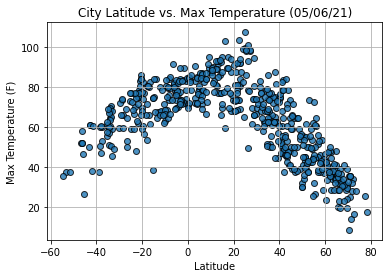

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

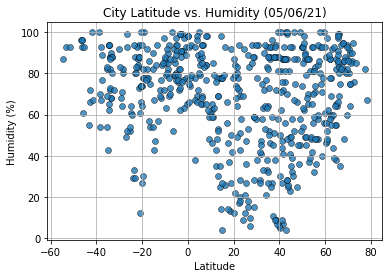

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

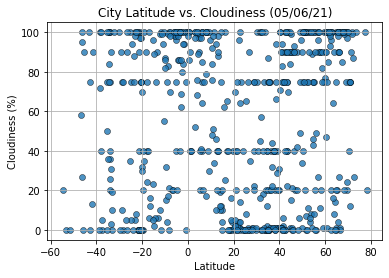

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot

## Latitude vs. Wind Speed Plot

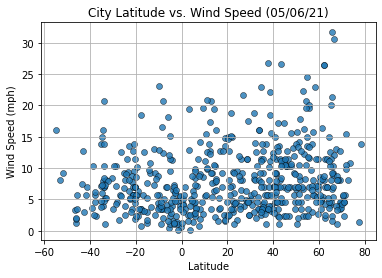

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=.5, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [34]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7223652877975807


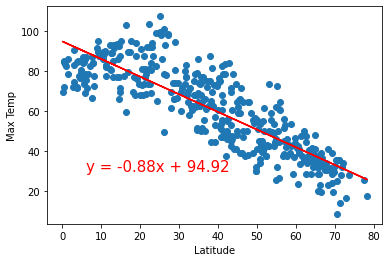

In [35]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]


# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.503271847472867


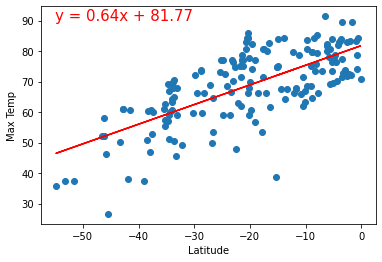

In [36]:
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016193088391424408


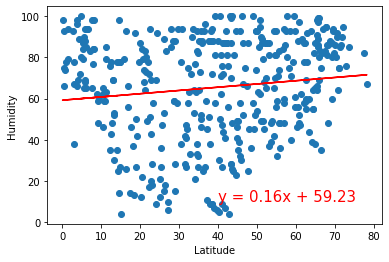

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00469984712700667


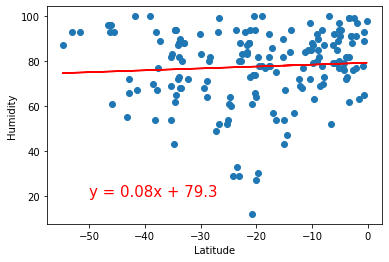

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01668884794062416


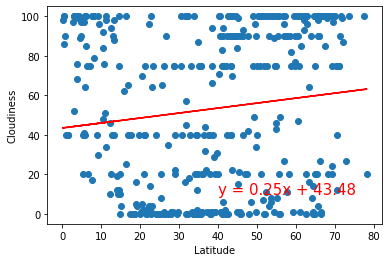

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06717438498760639


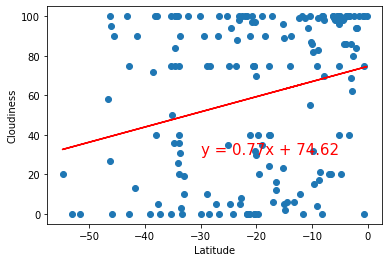

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013231744902292945


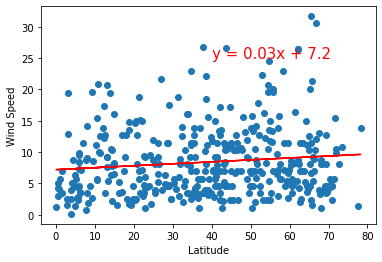

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression